In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view
from pprint import pprint

In [2]:
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#structure
with MPRester("TJVQZXfS2KHqvsC7QEip") as m:
    bande = m.get_bandstructure_by_material_id("mp-505297")


La structure de bandes électroniques du matériau:


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

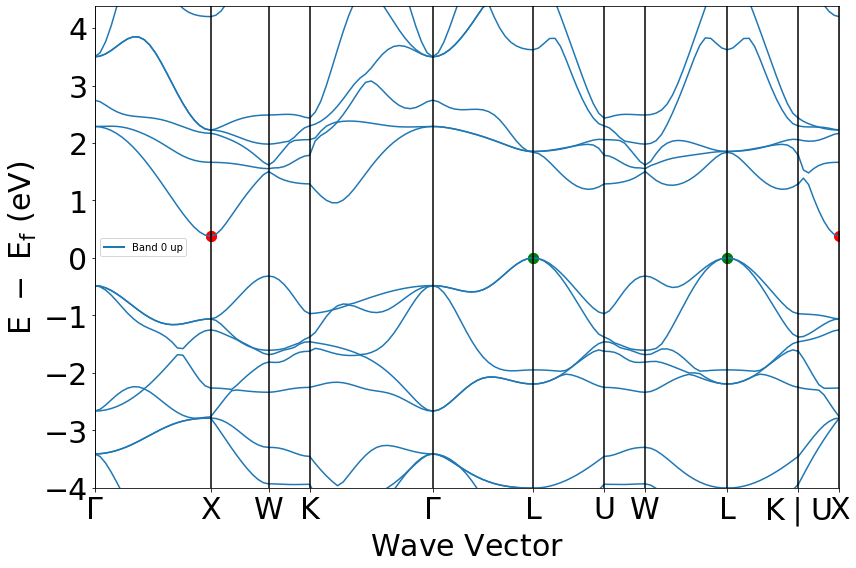

In [4]:
print('La structure de bandes électroniques du matériau:')
plot = BSPlotter(bande)
plot.get_plot(vbm_cbm_marker=True)

D'abord on doit déterminer la bande interdite

In [5]:
gap = bande.get_band_gap()
e_band = gap.get('energy')
if gap['direct'] == False :
    band = "indirecte"
else:
    band = "directe"
print('La bande est', band)
print('Energie de la bande :', e_band, 'eV.')
print("Bande interdite", band, "de", gap['energy'], "eV (isolant), lorsque le vecteur d'onde k évolue dans la direction ", gap['transition'] )

La bande est indirecte
Energie de la bande : 0.37729999999999997 eV.
Bande interdite indirecte de 0.37729999999999997 eV (isolant), lorsque le vecteur d'onde k évolue dans la direction  L-X


# Dernière bande de valence 

In [6]:
data = plotter.BSPlotter(bande).bs_plot_data()
x = data.get('ticks').get('distance')
x = np.array([x[0], x[1], x[3], x[5], x[7], x[9], x[11], x[13], x[15], x[17], x[18]])
y = data.get('energy')

# Determine l'énergie 0
E_0 = data.get('zero_energy')
print("Energie 0 = {} eV".format(E_0))

# Determine la dernière bande de valence
vbm = bande.get_vbm()
E_vbm = vbm['energy']
kpoint_vbm = vbm['kpoint'].cart_coords

print('Energie du maximum de la bande de valence = {} eV'.format(E_vbm))
print('sur le graphe : E-Ef = ', (E_vbm-E_0))
print('Vecteur k  en coordonnées cartésiennes =', kpoint_vbm)
print(vbm.get('band_index'))
print('Ce sont donc les bandes 13 et 14 qui ont la plus grande énergie de la bande de valence ')

Energie 0 = 6.9534 eV
Energie du maximum de la bande de valence = 6.9534 eV
sur le graphe : E-Ef =  0.0
Vecteur k  en coordonnées cartésiennes = [0.50653464 0.50653464 0.50653464]
defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]})


In [11]:
dx = np.zeros(10)
dyv = np.zeros(10)
mv = np.zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]
    
for i in range(10):
    dyv[i] =y.get('1')[i][14][-1] - y.get('1')[i][14][0]
    
for i in range (10):
    mv[i] = dyv[i]/dx[i] 
    
print(mv)
print("En valeur absolue:")
mxV = np.max(abs(mv))
print("Plus grande dispersion pour la bande de valence: ", mxV)
mnV = np.min(abs(mv))
print("Plus faible dispersion pour la bande de valence: ", mnV)


[-0.57212277  1.47393672 -1.83151167  0.45508598  0.54961355 -1.56550297
  1.83151167  0.44000951 -1.56550297 -0.25294963]
En valeur absolue:
Plus grande dispersion pour la bande de valence:  1.831511666920709
Plus faible dispersion pour la bande de valence:  0.2529496296082543


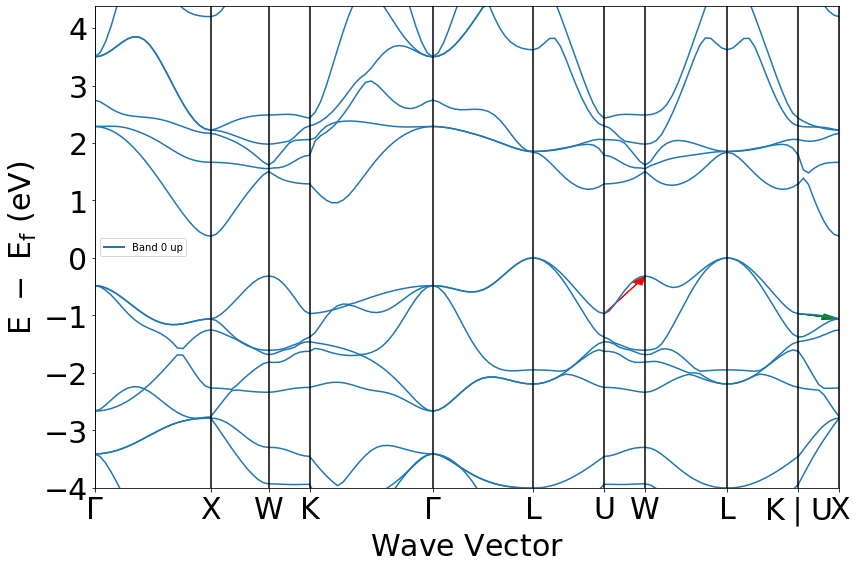

In [14]:
BSPlotter(bande).get_plot()
plt.arrow(x[6], (y.get('1')[6][14])[0], dx[6], dyv[6], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[9], (y.get('1')[9][14])[0], dx[9], dyv[9], color = 'g', head_width = 0.1,length_includes_head=True)
plt.show()


# Première bande de conduction

In [38]:
cbm = bande.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction = ',E_cbm,'eV')
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =',kpoint_cbm)
print(cbm.get('band_index'))
print("C'est donc la bande 15 qui a la plus basse énergie de la bande de conduction ")

Energie du minimum de la bande de conduction =  7.3307 eV
sur le graphe : E-Ef =  0.37729999999999997
Vecteur k (coordonnées cartésiennes) = [ 0.00000000e+00  1.01306927e+00 -1.11022302e-16]
defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})
C'est donc la bande 15 qui a la plus basse énergie de la bande de conduction 


In [32]:

dx = np.zeros(10)
dyc = np.zeros(10)
mc = np.zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]
    
for i in range(10):
    dyc[i] =y.get('1')[i][15][-1] - y.get('1')[i][15][0]
    
for i in range (10):
    mc[i] = dyc[i]/dx[i]
    
    
print(mc)    

print("En valeur absolue:")
mxC = np.max(abs(mc))
print("Plus grande dispersion pour la bande de conduction: ", mxC)
mnC = np.min(abs(mc))
print("Plus faible dispersion pour la bande de conduction: ", mnC)

[-1.88545843  2.22393479 -0.60305872  0.93027391 -0.51097419 -0.88865505
  0.60305872  0.46806849 -0.88865505 -2.54206002]
En valeur absolue:
Plus grande dispersion pour la bande de conduction:  2.5420600194074714
Plus faible dispersion pour la bande de conduction:  0.4680684923159416


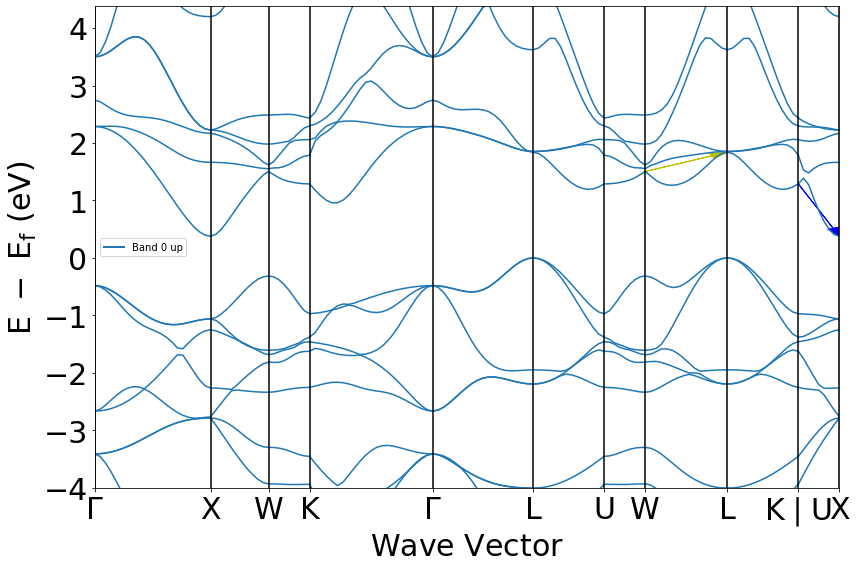

In [33]:
BSPlotter(bande).get_plot()
plt.arrow(x[9], (y.get('1')[9][15])[0], dx[9], dyc[9], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(x[7], (y.get('1')[7][15])[0], dx[7], dyc[7], color = 'y', head_width = 0.1,length_includes_head=True)

plt.show()

# En regroupant tout sur un seul graphe  

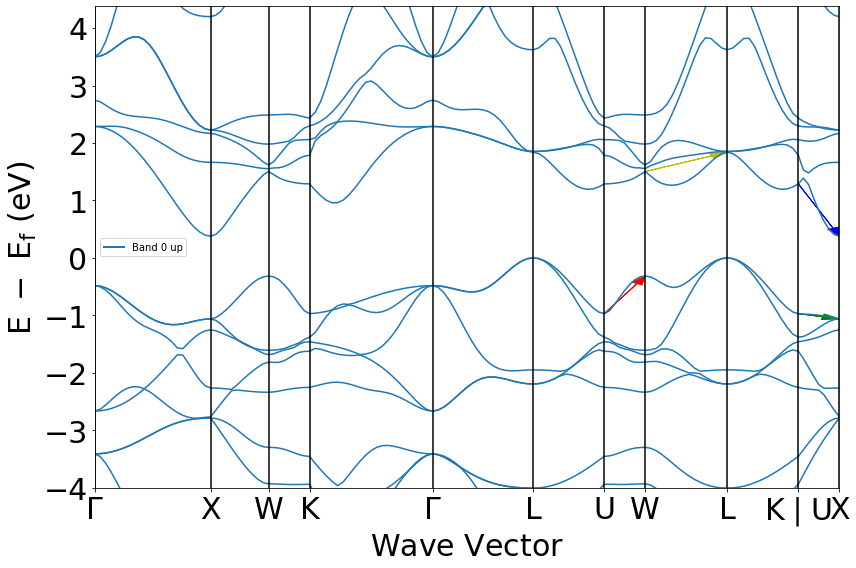

In [34]:
BSPlotter(bande).get_plot()
plt.arrow(x[9], (y.get('1')[9][15])[0], dx[9], dyc[9], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(x[7], (y.get('1')[7][15])[0], dx[7], dyc[7], color = 'y', head_width = 0.1,length_includes_head=True)
plt.arrow(x[6], (y.get('1')[6][14])[0], dx[6], dyv[6], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[9], (y.get('1')[9][14])[0], dx[9], dyv[9], color = 'g', head_width = 0.1,length_includes_head=True)
plt.show()


# Analyse

#  Calcul de la masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique.


In [35]:
print('1) Vérification que la norme est bien positive')
kpoint_val = bande.get_vbm().get('kpoint').frac_coords
norm_k_val = np.linalg.norm(kpoint_val)
print('Pour la bande de valence, la valeur de la norme est {}'.format(norm_k_val))

kpoint_con = bande.get_cbm().get('kpoint').frac_coords
norm_k_con = np.linalg.norm(kpoint_con)

print('Pour la bande de conduction, la valeur de la norme est {}'.format(norm_k_con))
print ('-> La norme est bien positive, on peut donc appliquer la formule et obtenir la masse effective  ')

h_bar = 6.5821e-16
m_electron = 9.11e-31
m_vbm = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*abs(E_vbm))
print('La masse effective au sommet de la dernière bande de valence = {} kg.'.format(m_vbm))

1) Vérification que la norme est bien positive
Pour la bande de valence, la valeur de la norme est 0.8660254037844386
Pour la bande de conduction, la valeur de la norme est 0.7071067811865476
-> La norme est bien positive, on peut donc appliquer la formule et obtenir la masse effective  
La masse effective au sommet de la dernière bande de valence = 2.3979564608440126e-32 kg.


# Calcul de la masse effective au base de la première bande de conduction en supposant une dispersion parabolique

In [36]:
m_cbm = (h_bar**2 * (kpoint_cbm[0]**2+kpoint_cbm[1]**2+kpoint_cbm[2]**2))/(2*E_cbm)
print('La masse effective à la base de la première bande de conduction = {} kg.'.format(m_cbm))

La masse effective à la base de la première bande de conduction = 3.03271637630472e-32 kg.
